<a href="https://colab.research.google.com/github/wasyl93822/Systemy-wspomagania-decyzji/blob/main/other_collections_4Tab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data set generation
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, Nadam
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def generate_dataset():
    X = []
    y = []
    means = [[1, 1, 1], [2, 2, 2], [-1, -1, -1], [-2, -2, -2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        if i < 2:
            t = np.linspace(0, 2 * np.pi, 1000) + i * np.pi / 5
            x = np.sin(t) * t
            y_ = np.cos(t) * t
            z = np.zeros(1000)  # Add a third dimension filled with zeros
            X_class = np.column_stack((x, y_, z))
        elif i < 4:
            X_class = np.random.multivariate_normal(means[i], covs[i], 1000)
        elif i < 6:
            x, y_, z = np.random.randn(3, 1000)
            X_class = np.column_stack((x, y_, z))
        elif i < 8:
            X_class = np.random.randn(1000, 3)
        else:
            x, y_, z = np.random.randn(3, 1000) * 2
            X_class = np.column_stack((x, y_, z))
        if i == 0:
            X = X_class
            y = np.array([i] * 1000)
        else:
            X = np.concatenate((X, X_class), axis=0)
            y = np.concatenate((y, np.array([i] * 1000)), axis=0)
    return X, y





In [ ]:
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], label='Class {}'.format(i))
    ax.legend()
    plt.show()



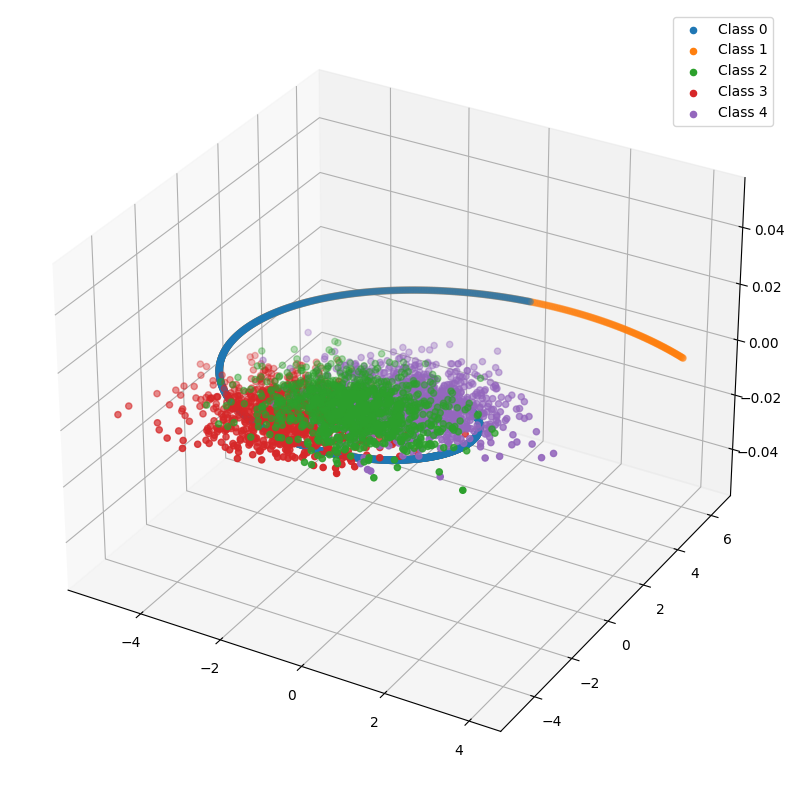

In [ ]:
(x, y) = generate_dataset()
plot_dataset(x, y)

In [ ]:
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

In [ ]:
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [ ]:
# Plot the training results
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [ ]:
def plot_classification_results(X, y, model):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension filled with zeros
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()


Eksperyment 1: Różne architektury i funkcje aktywacji
Configuration 1: 2 layers, 16 neurons, activation: relu


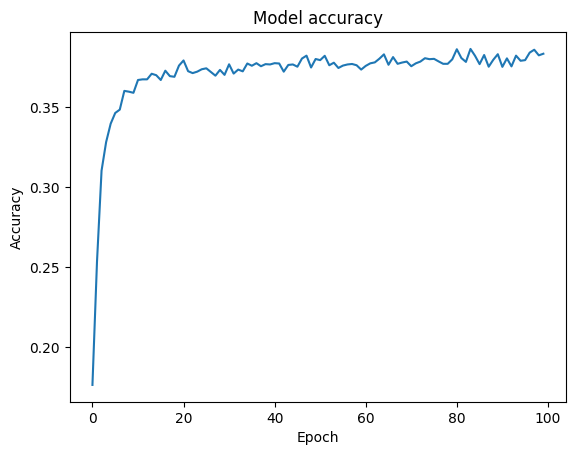

313/313 [==============================] - 0s 1ms/step


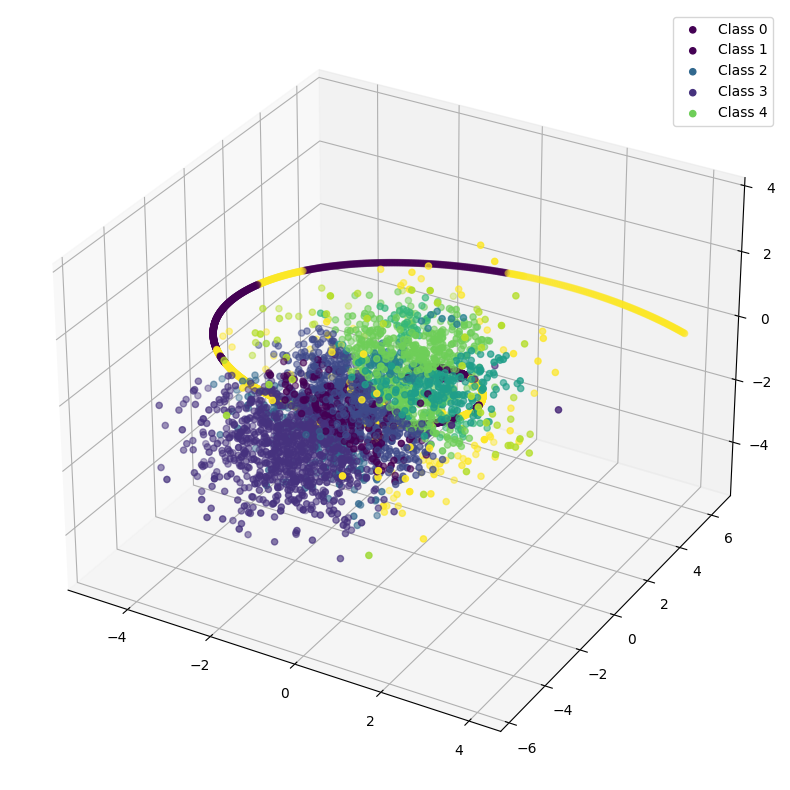

Test Accuracy: 0.3833000063896179

Configuration 2: 3 layers, 32 neurons, activation: tanh


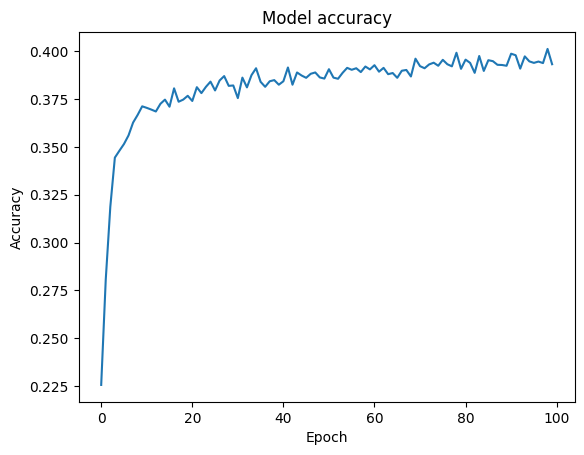

313/313 [==============================] - 1s 1ms/step


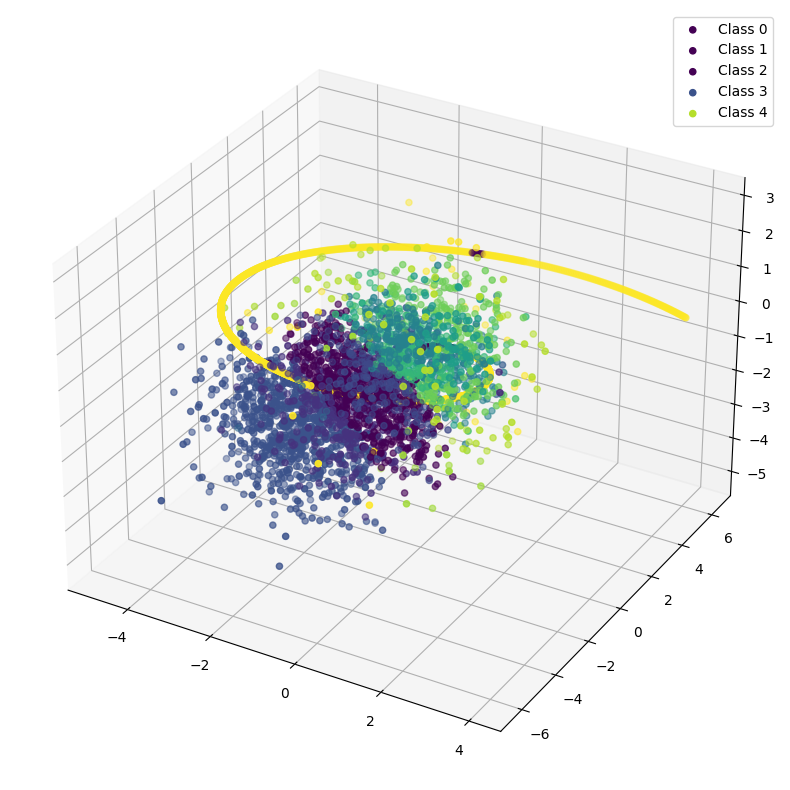

Test Accuracy: 0.39320001006126404

Configuration 3: 4 layers, 64 neurons, activation: sigmoid


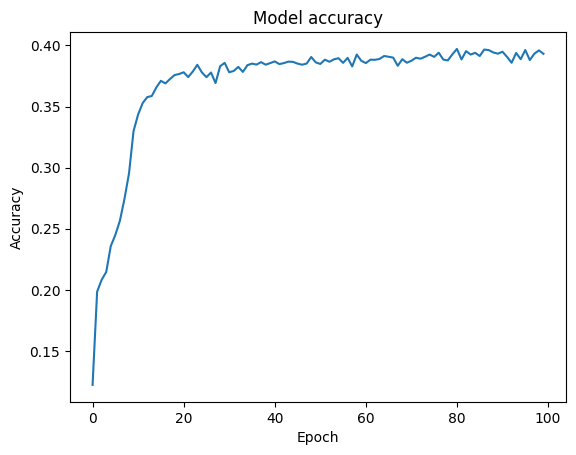

313/313 [==============================] - 1s 2ms/step


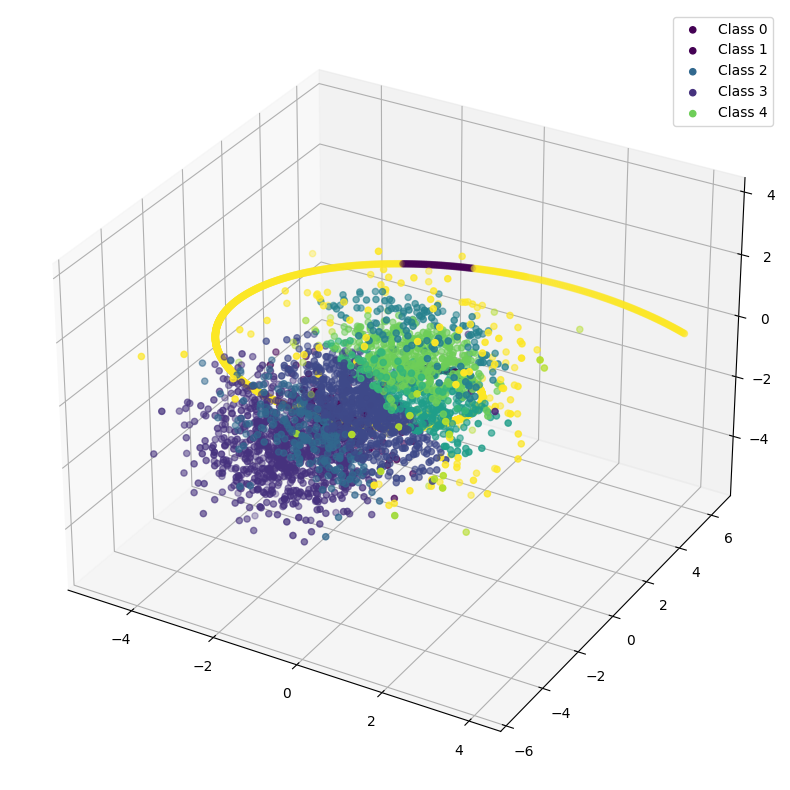

Test Accuracy: 0.39309999346733093

Configuration 4: 2 layers, 32 neurons, activation: elu


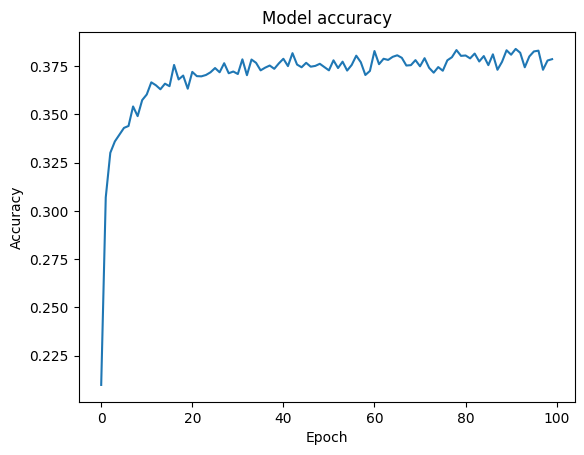

313/313 [==============================] - 1s 2ms/step


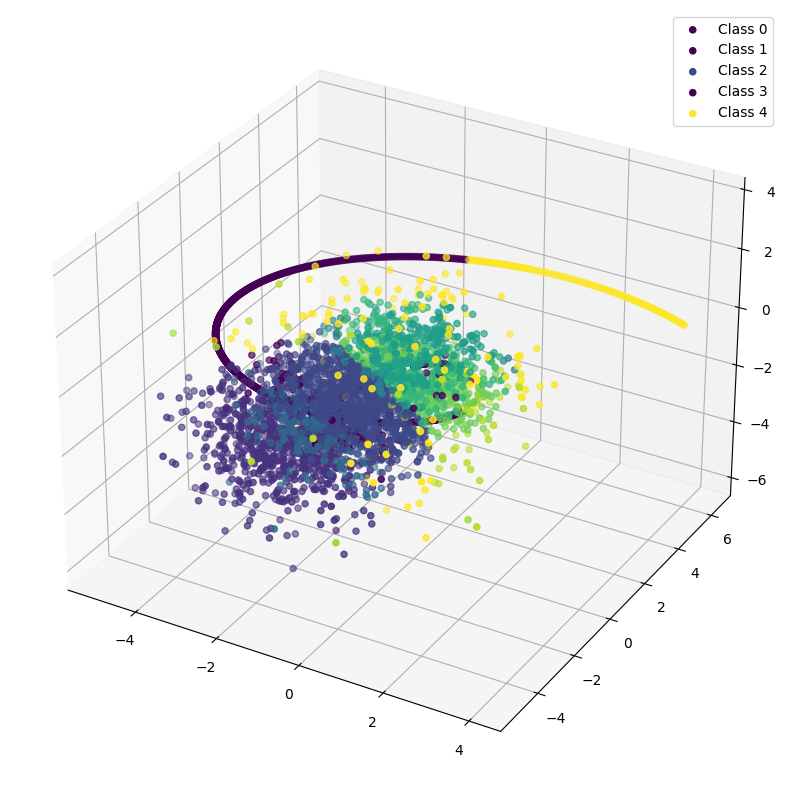

Test Accuracy: 0.37860000133514404

Configuration 5: 3 layers, 64 neurons, activation: relu


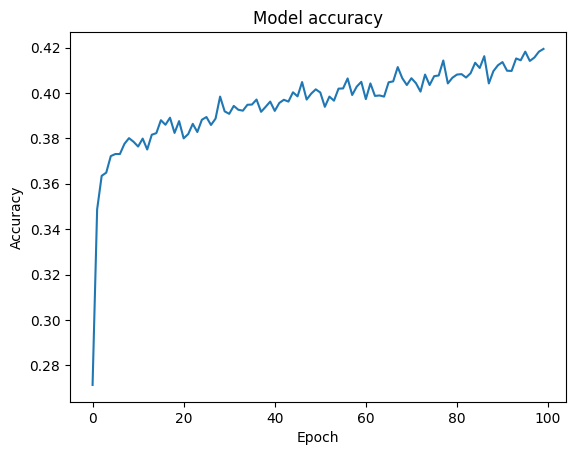

313/313 [==============================] - 1s 2ms/step


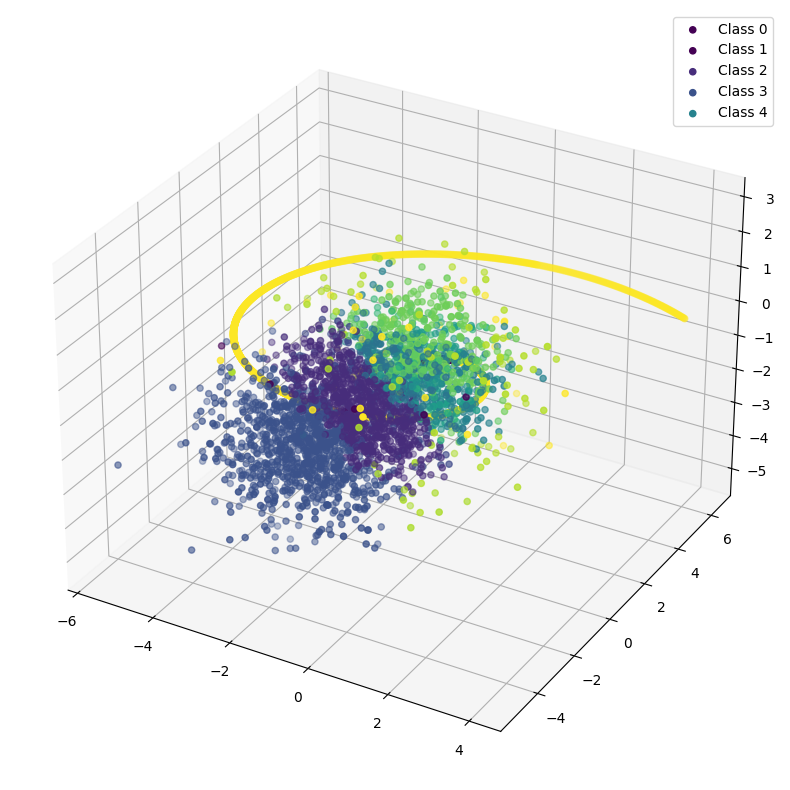

Test Accuracy: 0.41940000653266907

Eksperyment 2: Wpływ ilości epok i learning rate
Configuration: 50 epochs, learning rate: 0.001


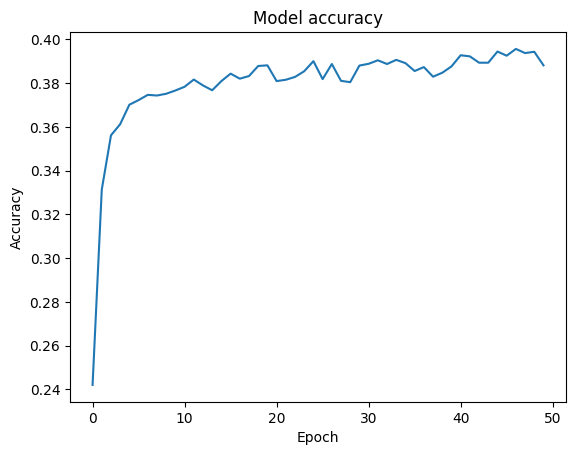

313/313 [==============================] - 1s 2ms/step


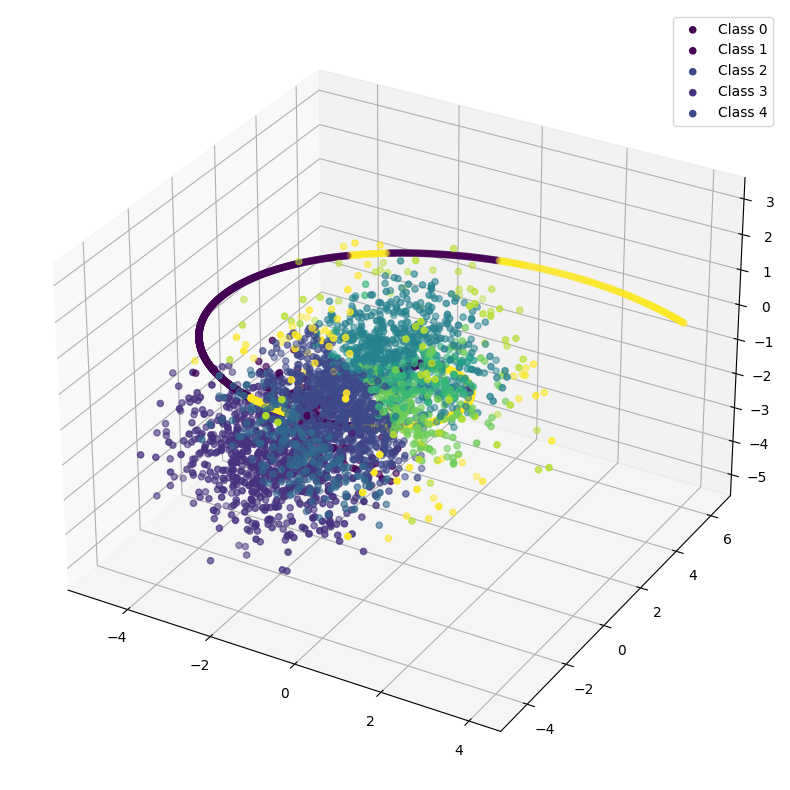

Test Accuracy: 0.3880999982357025

Configuration: 50 epochs, learning rate: 0.01


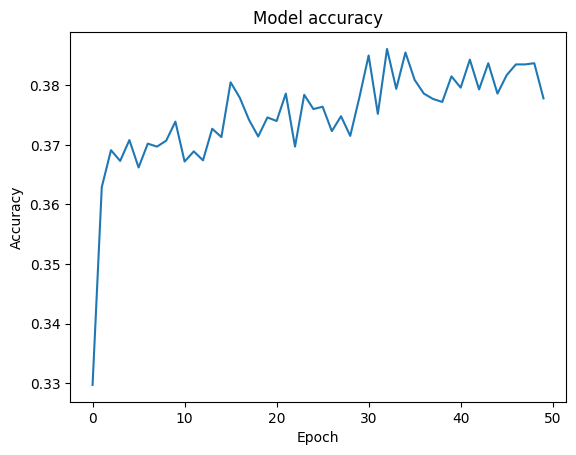

313/313 [==============================] - 1s 2ms/step


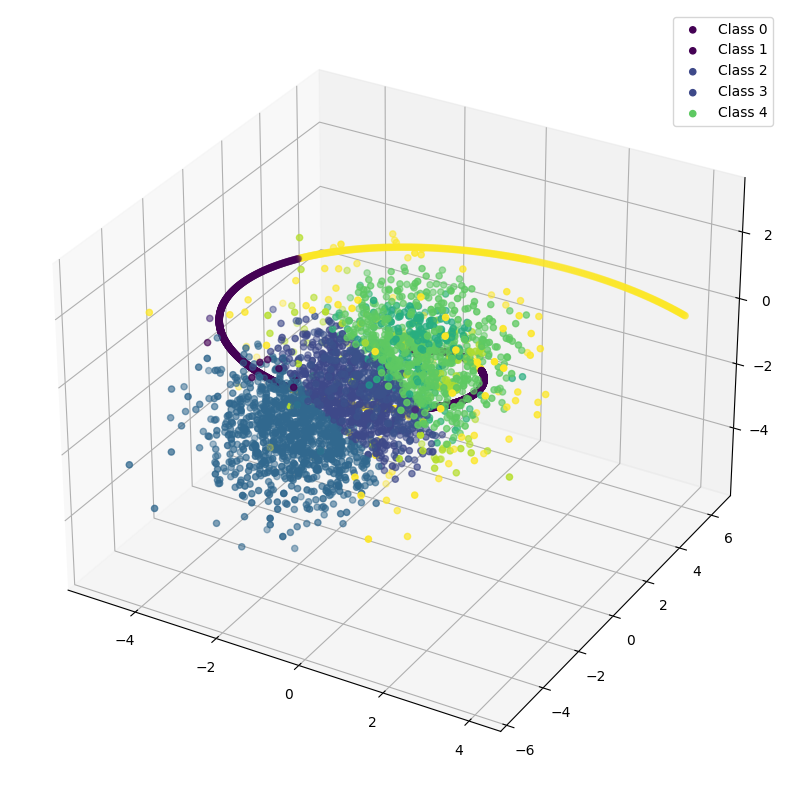

Test Accuracy: 0.37779998779296875

Configuration: 50 epochs, learning rate: 0.1


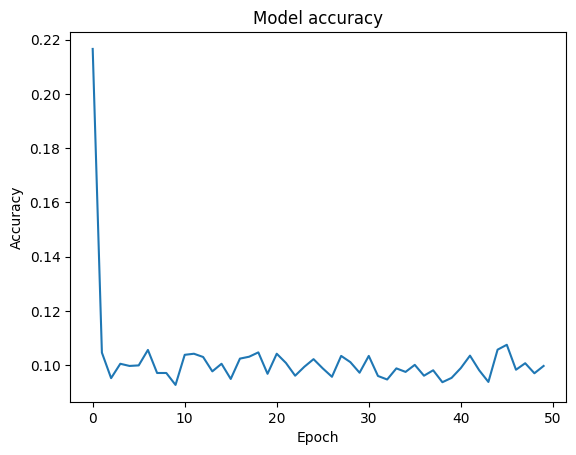

313/313 [==============================] - 1s 2ms/step


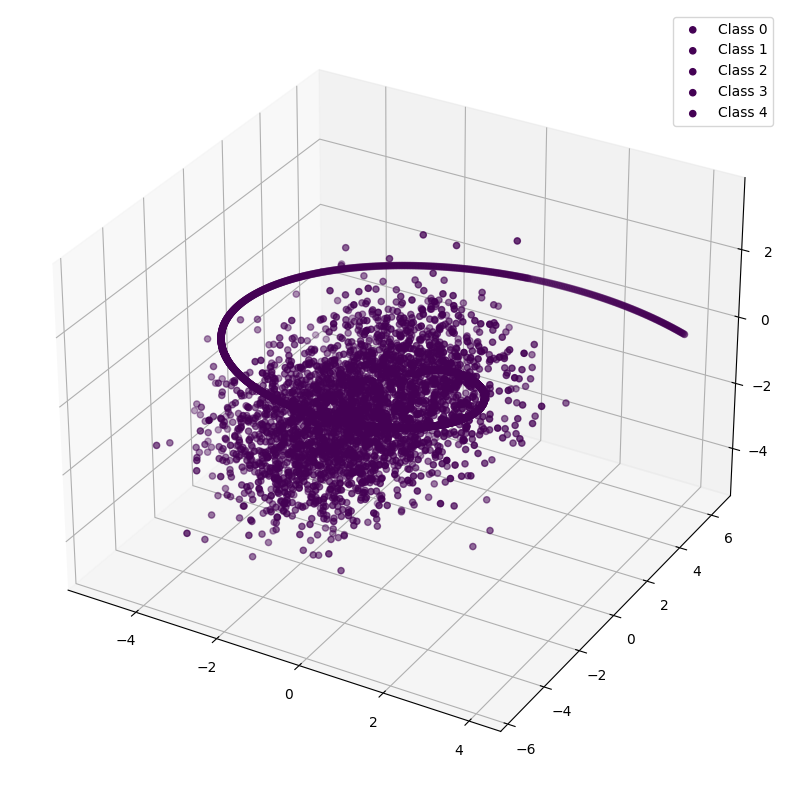

Test Accuracy: 0.09969999641180038

Configuration: 100 epochs, learning rate: 0.001


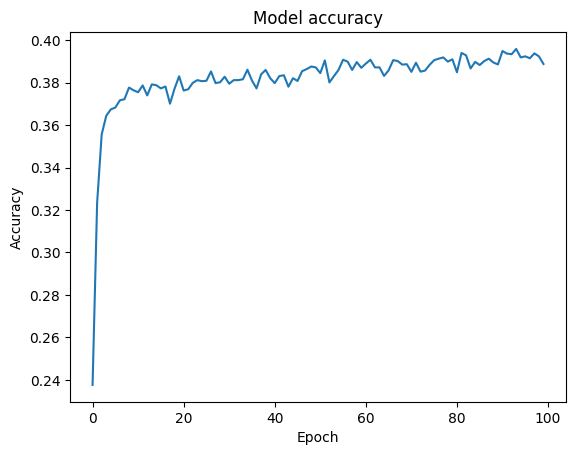

313/313 [==============================] - 1s 2ms/step


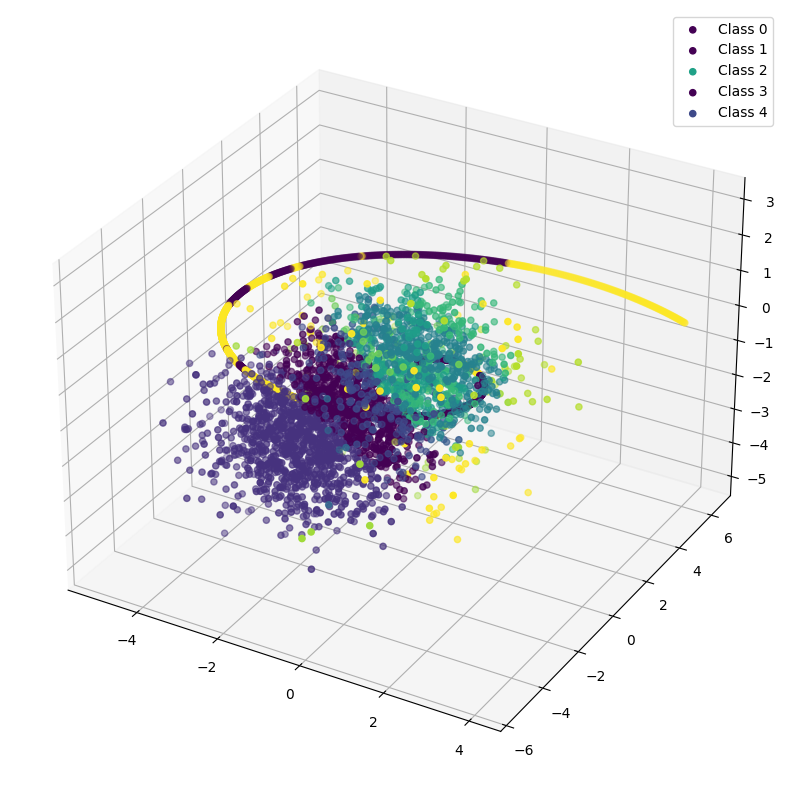

Test Accuracy: 0.3887999951839447

Configuration: 100 epochs, learning rate: 0.01


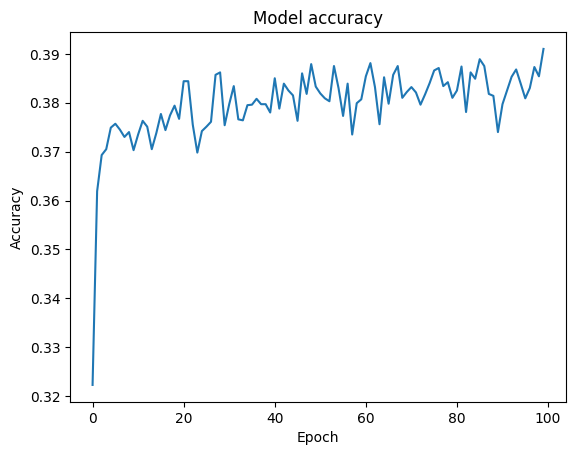

313/313 [==============================] - 1s 2ms/step


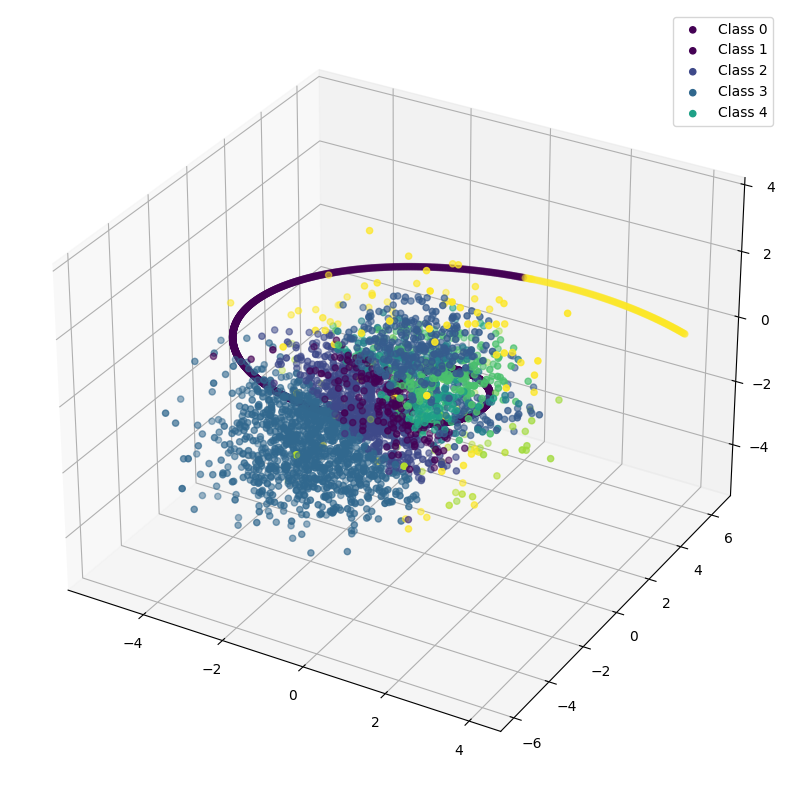

Test Accuracy: 0.39100000262260437

Configuration: 100 epochs, learning rate: 0.1


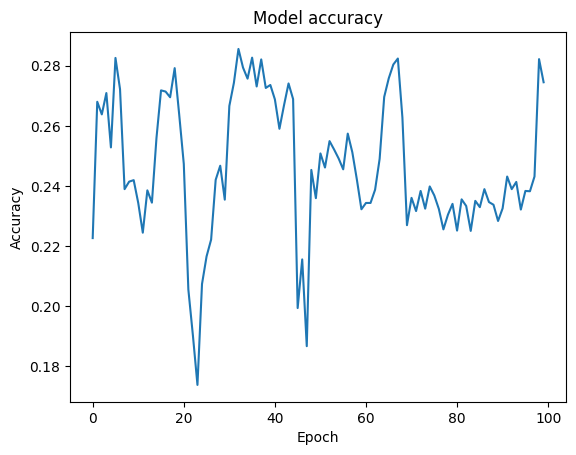

313/313 [==============================] - 1s 2ms/step


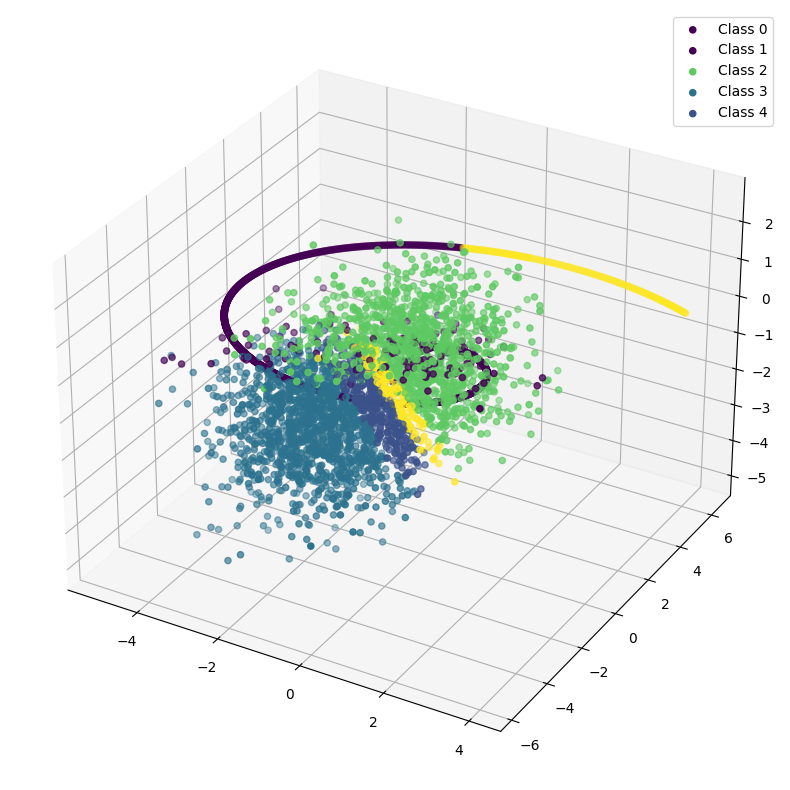

Test Accuracy: 0.2745000123977661

Configuration: 200 epochs, learning rate: 0.001


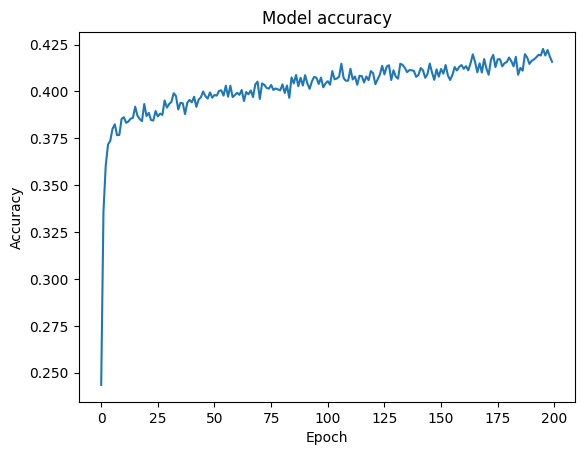

313/313 [==============================] - 1s 2ms/step


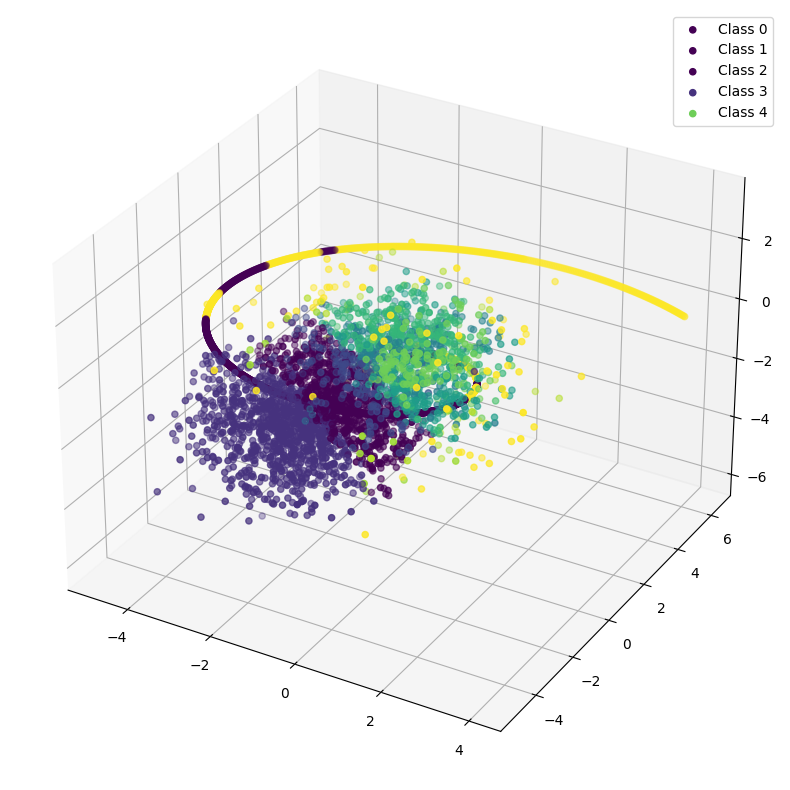

Test Accuracy: 0.415800005197525

Configuration: 200 epochs, learning rate: 0.01


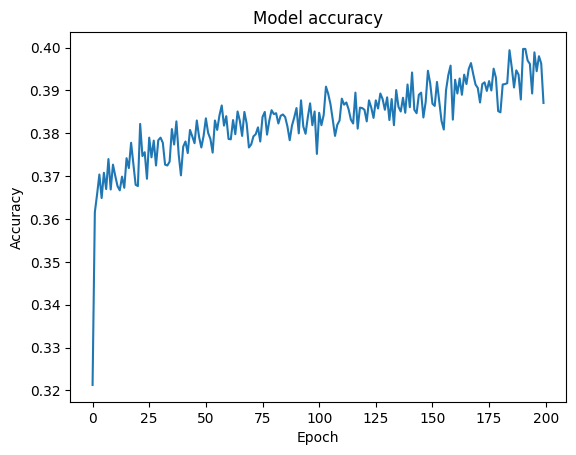

313/313 [==============================] - 1s 2ms/step


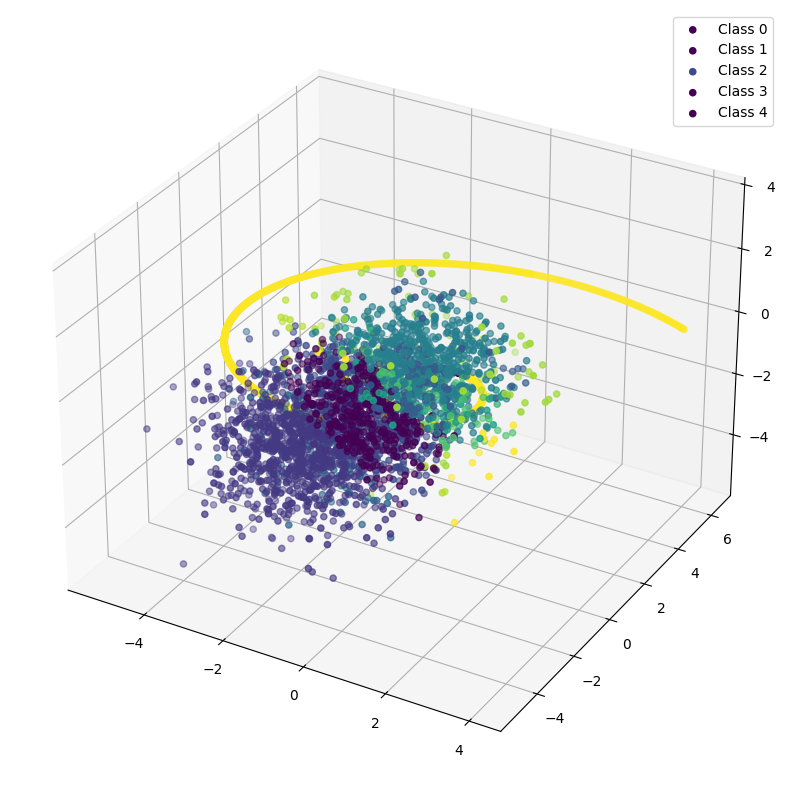

Test Accuracy: 0.3871000111103058

Configuration: 200 epochs, learning rate: 0.1


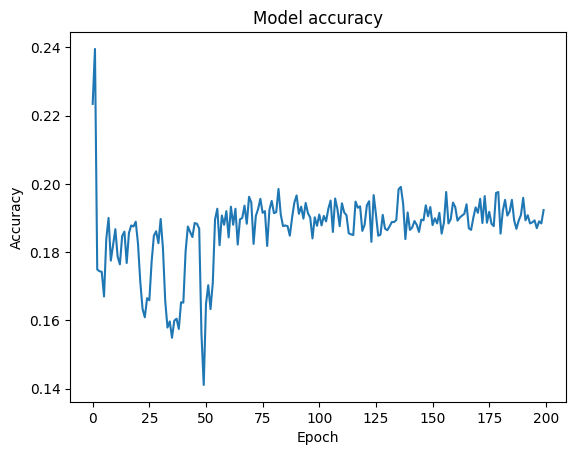

313/313 [==============================] - 1s 2ms/step


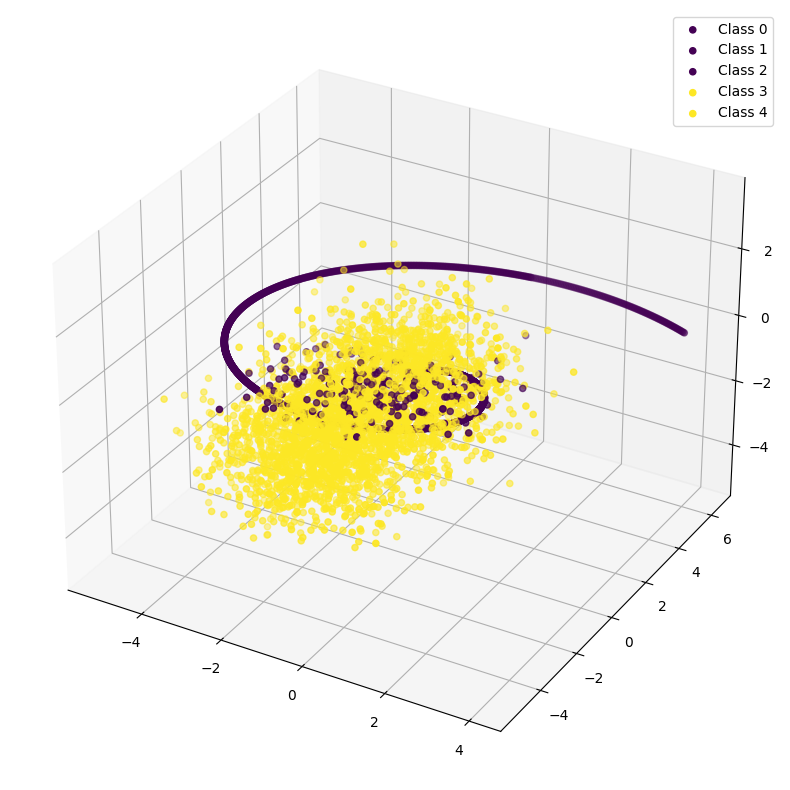

Test Accuracy: 0.1923000067472458

Configuration: 300 epochs, learning rate: 0.001


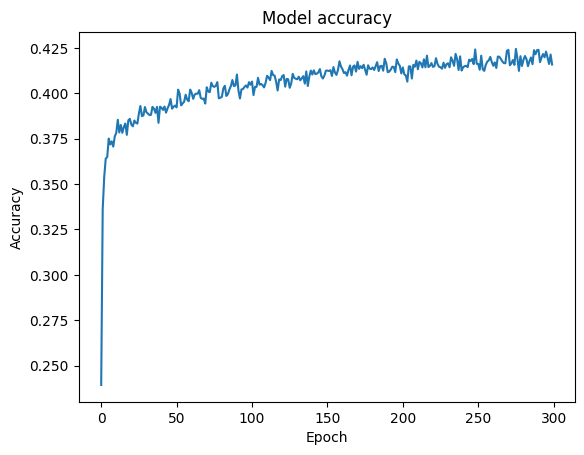

313/313 [==============================] - 1s 2ms/step


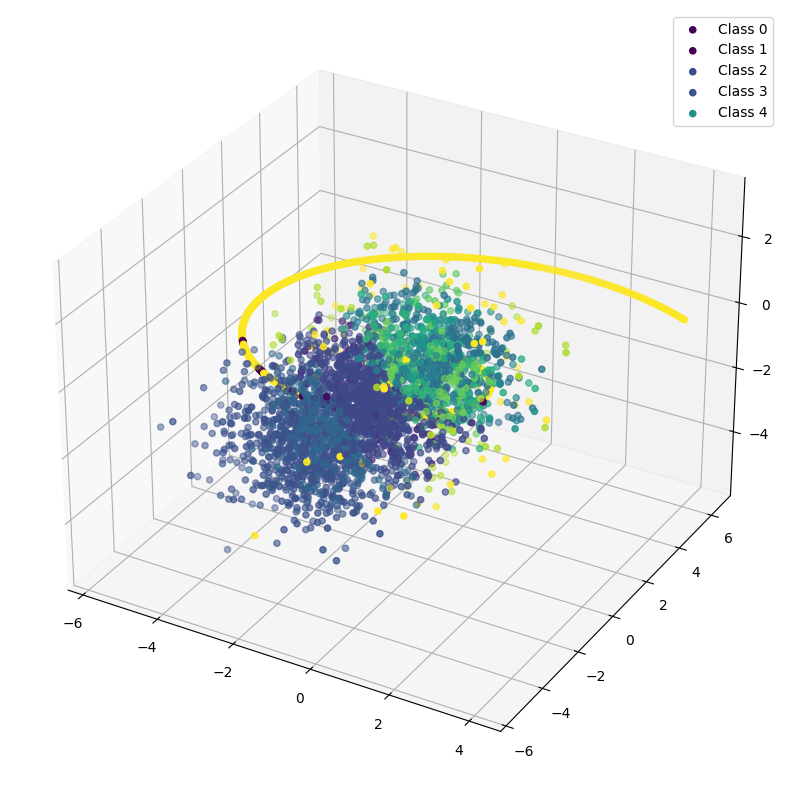

Test Accuracy: 0.415800005197525

Configuration: 300 epochs, learning rate: 0.01


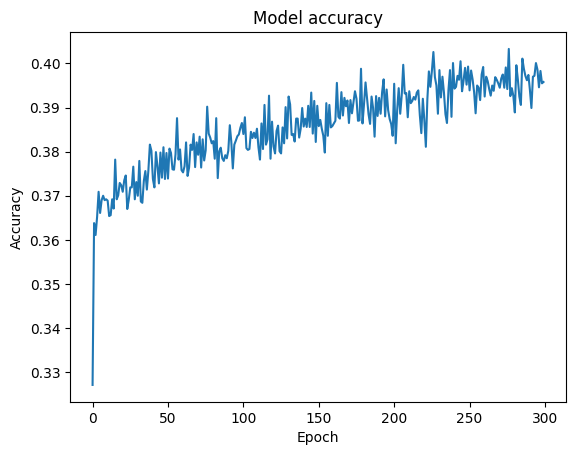

313/313 [==============================] - 1s 2ms/step


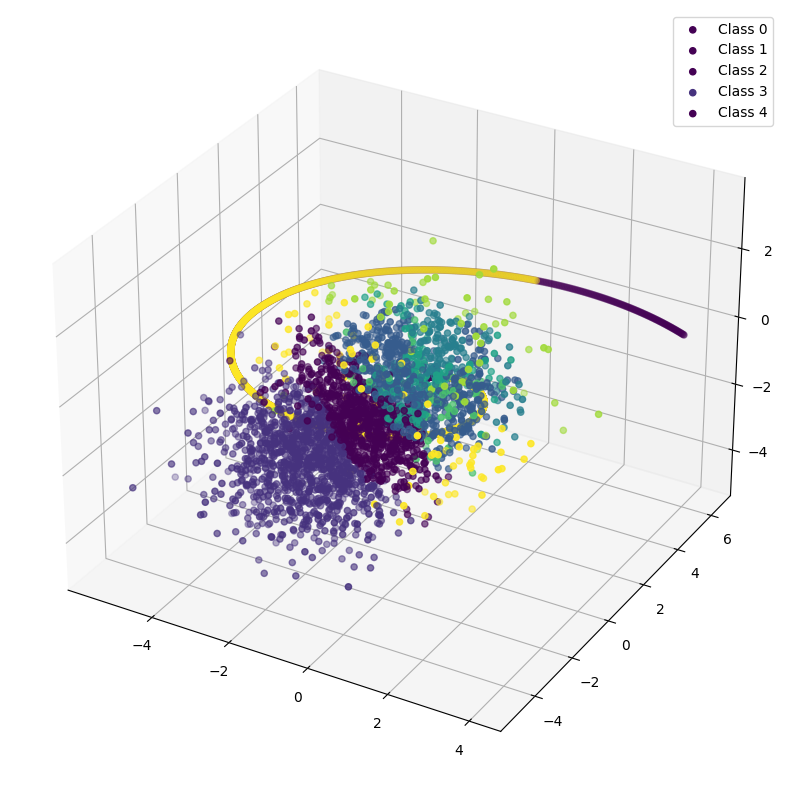

Test Accuracy: 0.39579999446868896

Configuration: 300 epochs, learning rate: 0.1


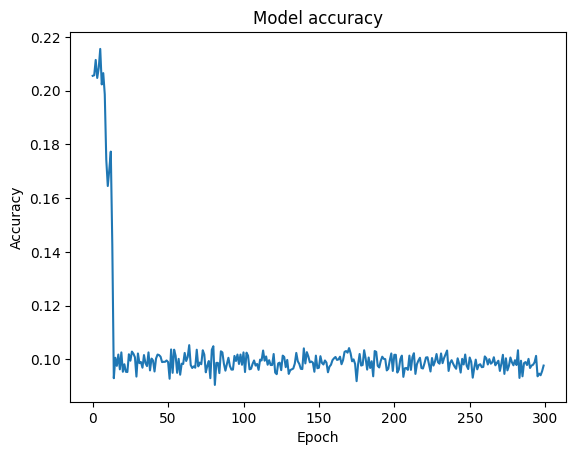

313/313 [==============================] - 1s 2ms/step


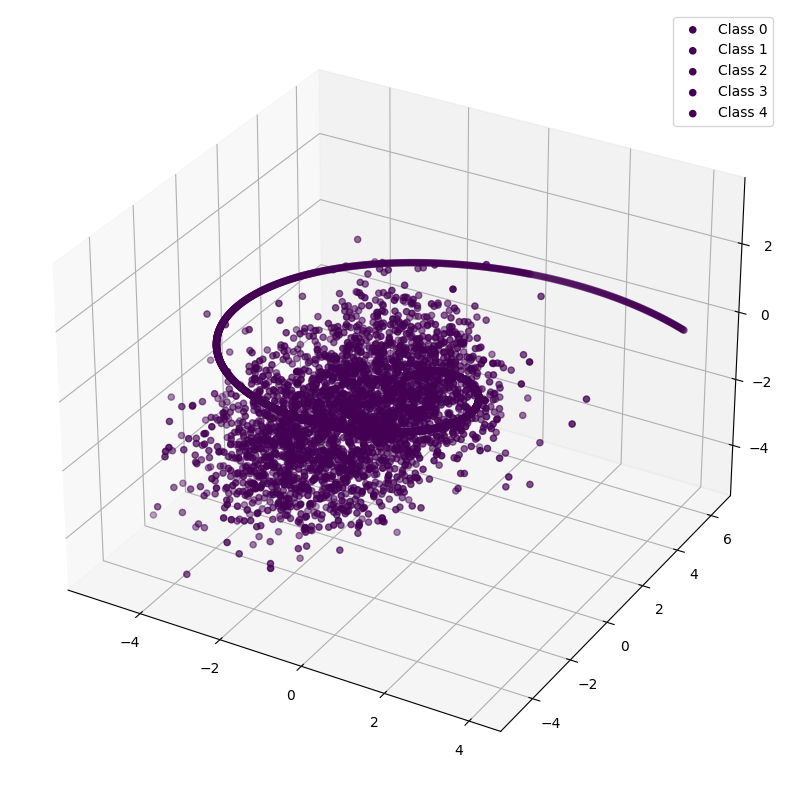

Test Accuracy: 0.09769999980926514



In [ ]:
def experiment(num_layers, neurons_per_layer, activation, epochs, learning_rate):
    X, y = generate_dataset()

    classifier = Classifier(num_layers, neurons_per_layer, activation)
    model = classifier.build_model(input_shape=3)

    # Ustawienie dynamicznego spadku learning rate
    lr_schedule = ExponentialDecay(learning_rate, decay_steps=10000, decay_rate=0.9)
    optimizer = Adam(learning_rate=lr_schedule)

    history = train(X, y, model, optimizer, epochs)
    plot_history(history)

    # Wyświetlenie wyników klasyfikacji
    plot_classification_results(X, y, model)

    # Odczytanie ostatecznej dokładności
    accuracy = history.history['accuracy'][-1]
    return accuracy

architectures = [
    (2, 16, 'relu'),
    (3, 32, 'tanh'),
    (4, 64, 'sigmoid'),
    (2, 32, 'elu'),
    (3, 64, 'relu')
]

print("Eksperyment 1: Różne architektury i funkcje aktywacji")
for i, (num_layers, neurons_per_layer, activation) in enumerate(architectures):
    print(f"Configuration {i + 1}: {num_layers} layers, {neurons_per_layer} neurons, activation: {activation}")
    accuracy = experiment(num_layers, neurons_per_layer, activation, epochs=100, learning_rate=0.001)
    print(f"Test Accuracy: {accuracy}\n")

# Eksperyment 2: Sprawdzić wpływ ilości epok i learning rate
epochs_to_test = [50, 100, 200, 300]
learning_rates = [0.001, 0.01, 0.1]

print("Eksperyment 2: Wpływ ilości epok i learning rate")
for epochs in epochs_to_test:
    for lr in learning_rates:
        print(f"Configuration: {epochs} epochs, learning rate: {lr}")
        accuracy = experiment(num_layers=3, neurons_per_layer=32, activation='relu', epochs=epochs, learning_rate=lr)
        print(f"Test Accuracy: {accuracy}\n")
